# Importing libs: dlib, opencv and deep face

In [4]:
#opencv
#!pip install opencv-python

#dlib (error)
#!pip install https://pypi.python.org/packages/da/06/bd3e241c4eb0a662914b3b4875fc52dd176a9db0d4a2c915ac2ad8800e9e/dlib-19.7.0-cp36-cp36m-win_amd64.whl#md5=b7330a5b2d46420343fbed5df69e6a3f

#deepface
#!pip install deepface

ERROR: dlib-19.7.0-cp36-cp36m-win_amd64.whl is not a supported wheel on this platform.


In [4]:
import cv2

In [6]:
from deepface import DeepFace
import matplotlib.pyplot as plt

In [7]:
analysis = DeepFace.analyze(img_path = "/home/fernandonjardim/code/marchigginsberlin/face_mask_detection/raw_data/testing/fernando/fernando.jpg", actions = ["age", "gender", "emotion", "race"])                                                                                                                                              

Action: race: 100%|███████████████████████████████████████████████████████████████████████| 4/4 [00:16<00:00,  4.13s/it]


In [8]:
print(analysis)

{'age': 31, 'region': {'x': 99, 'y': 55, 'w': 127, 'h': 127}, 'gender': 'Man', 'emotion': {'angry': 0.196514883866622, 'disgust': 0.00046494000258406594, 'fear': 0.2747131882577314, 'happy': 98.00691628373667, 'sad': 0.6773910609017538, 'surprise': 0.3370571945390469, 'neutral': 0.5069393525940952}, 'dominant_emotion': 'happy', 'race': {'asian': 0.005149553544470109, 'indian': 5.117082595825195, 'black': 0.17104920698329806, 'white': 0.7502470631152391, 'middle eastern': 91.19219779968262, 'latino hispanic': 2.764277532696724}, 'dominant_race': 'middle eastern'}


In [9]:
DeepFace.stream(db_path = "/home/fernandonjardim/code/marchigginsberlin/face_mask_detection/raw_data/testing/fernando")

Detector backend is  opencv
VGG-Face  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  0.0018448829650878906  seconds


Finding embedding for fernando.jpg: 100%|█████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]

Embeddings found for given data set in  1.3123061656951904  seconds



[ WARN:0] global /tmp/pip-req-build-afu9cjzs/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


In [10]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

detected_face = DeepFace.detectFace(img_path = "/home/fernandonjardim/code/marchigginsberlin/face_mask_detection/raw_data/testing/fernando/fernando.jpg", detector_backend = backends[4])


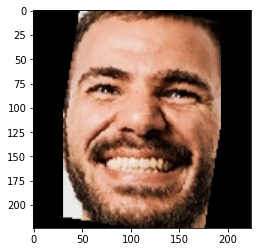

In [11]:
plt.imshow(detected_face)

In [45]:
cap = cv2.VideoCapture(-1)
while True:

    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0] global /tmp/pip-req-build-afu9cjzs/opencv/modules/videoio/src/cap_v4l.cpp (877) open VIDEOIO(V4L2): can't find camera device


error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/highgui/src/window.cpp:1006: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [34]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import cv2
import time
output_notebook()

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)
while True:
    ret, frame = cap.read()
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data["image"]=[frame]
    push_notebook()
    time.sleep(0.3)

Loading BokehJS ...

[ WARN:0] global /tmp/pip-req-build-afu9cjzs/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [37]:
import face_recognition
import cv2
import numpy as np

# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(-1)

# Load a sample picture and learn how to recognize it.
fernando_image = face_recognition.load_image_file('fernando.jpg')
fernando_face_encoding = face_recognition.face_encodings(fernando_image)[0]

# Load a second sample picture and learn how to recognize it.
emanuel_image = face_recognition.load_image_file("emanuel.png")
emanuel_face_encoding = face_recognition.face_encodings(emanuel_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    fernando_face_encoding,
    emanuel_face_encoding
]
known_face_names = [
    "Fernando Jardim",
    "Emanuel Müller"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

[ WARN:0] global /tmp/pip-req-build-afu9cjzs/opencv/modules/videoio/src/cap_v4l.cpp (877) open VIDEOIO(V4L2): can't find camera device


error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


# New_try